In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# **Part I**

In [2]:
df = pd.read_csv("../input/mall-customers/Mall_Customers.csv")

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

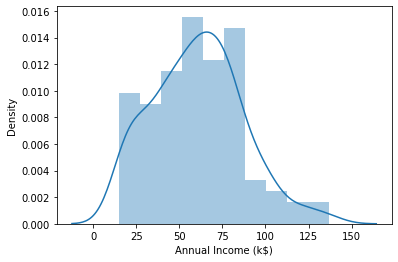

In [5]:
sns.distplot(df['Annual Income (k$)'])

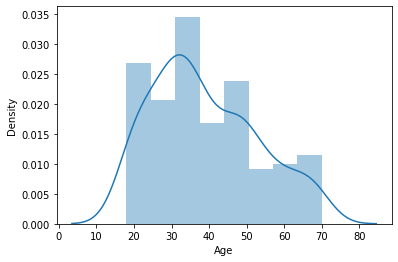

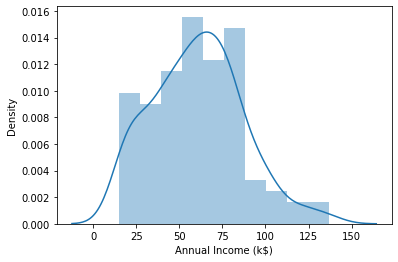

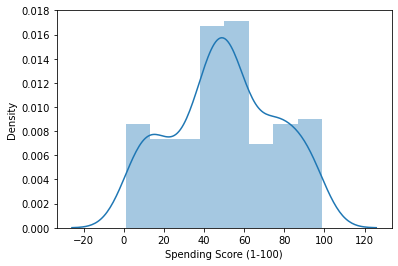

In [6]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

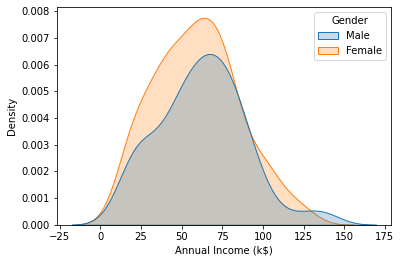

In [7]:
sns.kdeplot(df['Annual Income (k$)'], shade= True, hue= df['Gender'])

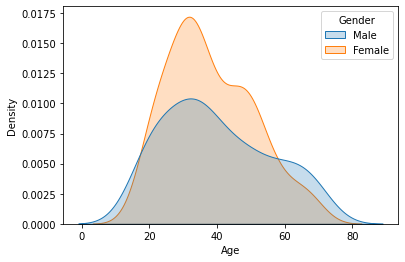

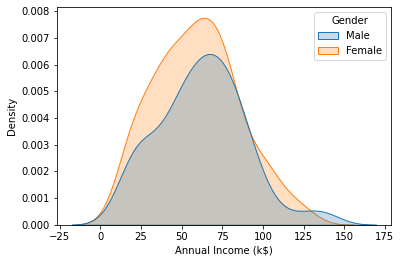

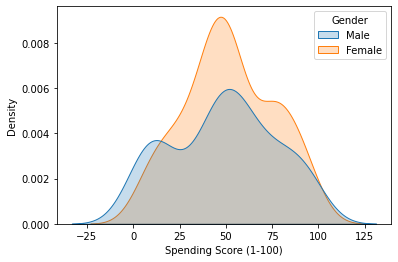

In [8]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade= True, hue= df['Gender'])

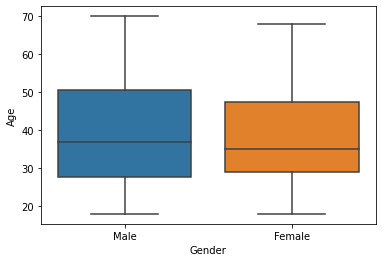

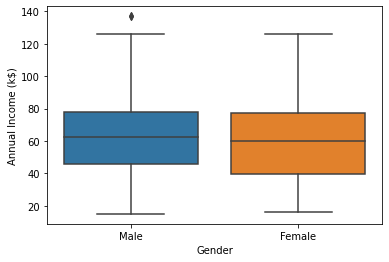

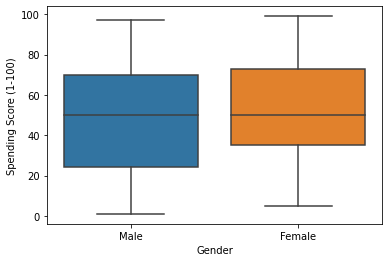

In [9]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data= df, x= 'Gender',y= df[i])

In [10]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# **Part II**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

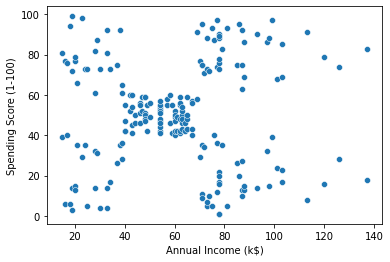

In [11]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

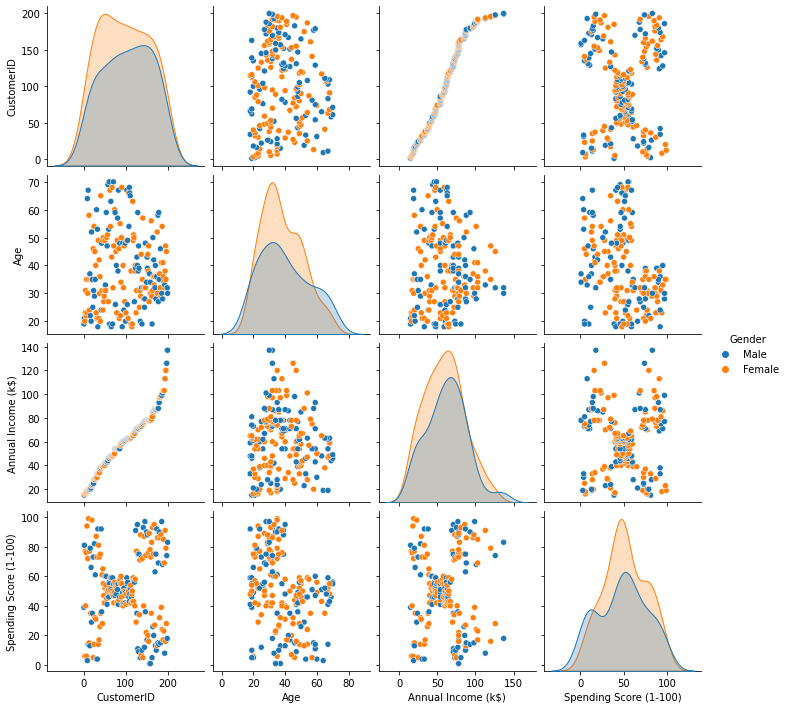

In [12]:
# df=df.drop('CustomerID',axis =1)
sns.pairplot(df, hue='Gender')

In [13]:
df.corr()

CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000

<AxesSubplot:>

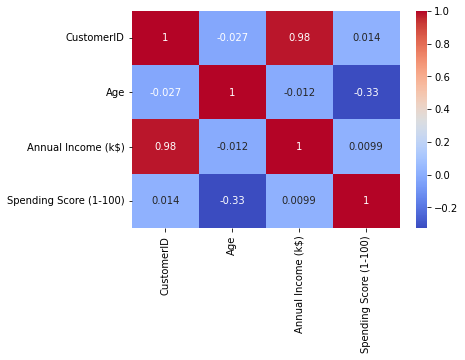

In [14]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [15]:
#First n_clusters was 6, after the graph we have in the graph we change the number of clusters to 3
clustering1=KMeans(n_clusters= 3)

In [16]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [18]:
df['Income Cluster']= clustering1.labels_
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [19]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [20]:
clustering1.inertia_

23517.330930930926

In [21]:
inertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_score.append(kmeans.inertia_)

In [22]:
inertia_score

[137277.28,
 48660.88888888889,
 23517.330930930926,
 13278.112713472488,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2857.4416971916976,
 2168.4787157287155,
 1734.167748917749]

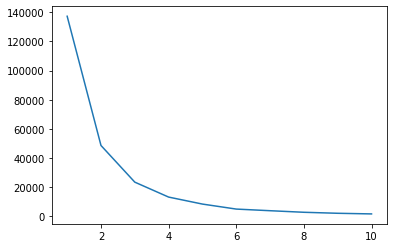

In [23]:
plt.plot(range(1,11),inertia_score)

In [24]:
df.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               39.500000           33.486486               50.229730
1               37.833333           99.888889               50.638889
2               38.722222           67.088889               50.000000

In [25]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df["Spending and Income Cluster"] = clustering2.labels_
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  Spending and Income Cluster  
0               0                            2  
1               0                            3  
2               0                            2  
3               0                            3  
4               0                            2

In [26]:
inertia_score2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)

In [27]:
inertia_score2

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25047.716267982447,
 21806.81299869546,
 19787.670554966855]

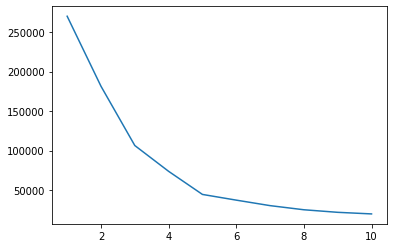

In [28]:
plt.plot(range(1,11),inertia_score2)

In [29]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

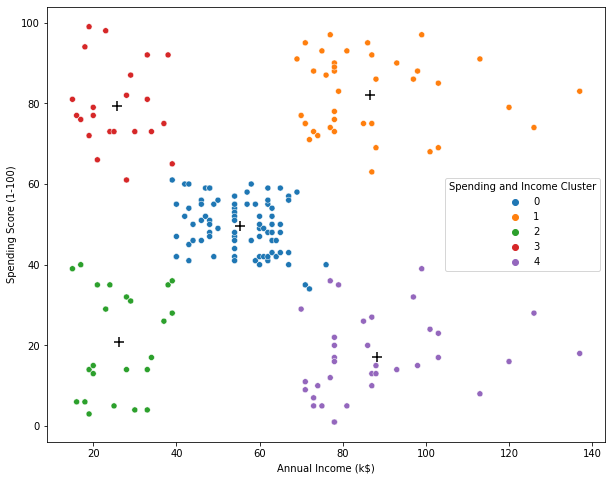

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers["x"],y=centers['y'],s=100,c='black',marker="+")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [31]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            42.716049           55.296296   
1                            32.692308           86.538462   
2                            45.217391           26.304348   
3                            25.272727           25.727273   
4                            41.114286           88.200000   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         49.518519  
1                                         82.128205  
2                                         20.913043  
3                                         79.363636  
4                                         17.114286

In [32]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender                         Female      Male
Spending and Income Cluster                    
0                            0.592593  0.407407
1                            0.538462  0.461538
2                            0.608696  0.391304
3                            0.590909  0.409091
4                            0.457143  0.542857

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale= StandardScaler()

In [35]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  Spending and Income Cluster  
0               0                            2  
1               0                            3  
2               0                            2  
3               0                            3  
4               0                            2

In [36]:
dff=pd.get_dummies(df, drop_first=True)
dff.head()

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   19                  15                      39   
1           2   21                  15                      81   
2           3   20                  16                       6   
3           4   23                  16                      77   
4           5   31                  17                      40   

   Income Cluster  Spending and Income Cluster  Gender_Male  
0               0                            2            1  
1               0                            3            1  
2               0                            2            0  
3               0                            3            0  
4               0                            2            0

In [37]:
dff = dff[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39            1
1   21                  15                      81            1
2   20                  16                       6            0
3   23                  16                      77            0
4   31                  17                      40            0

In [38]:
dff = scale.fit_transform(dff)

In [39]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

0         1         2         3
0 -1.424569 -1.738999 -0.434801  1.128152
1 -1.281035 -1.738999  1.195704  1.128152
2 -1.352802 -1.700830 -1.715913 -0.886405
3 -1.137502 -1.700830  1.040418 -0.886405
4 -0.563369 -1.662660 -0.395980 -0.886405

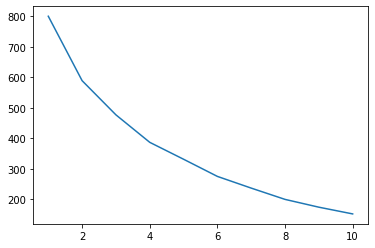

In [40]:
inertia_score3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_score3)

In [41]:
df.to_csv('Clustering.csv')

#### 